# Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

In [2]:
iris_data = pd.read_csv("./Iris.csv", index_col=0)

In [3]:
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


### EDA

- How large is the iris_data?

In [4]:
iris_data.shape

(150, 5)

- So, this is a small data set, still we can draw some amazing insights from it, let's have a look!

- **Features Info**

In [5]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


- All but **Species** features is *object* type. Rest are *float64* type.
- Which is kind of obvious, because *Species* is a target variable agianst which our predictions will be compared.
- Rest are *float64* type, this makes our *preprocessing* easier as we don't have to take care of the data type conversion.

##### Categorizing values in the dataset:
    1. Categorical: finite set number of values
    2. Continuous: infinite number of values
    3. Discrete: finite number of values that must be numeric
- we need to make a list seperating features of our dataset on the basis of above 3 points.

- check the unique values of each feature:
    - if we miss any misformatted value.
    - to identify which type these feature belong amongst the above 3.

In [6]:
def find_unique(col,data):
    print('{}:{}'.format(col,data[col].unique()))

In [7]:
for col in iris_data.columns:
    find_unique(col,iris_data)

SepalLengthCm:[5.1 4.9 4.7 4.6 5.  5.4 4.4 4.8 4.3 5.8 5.7 5.2 5.5 4.5 5.3 7.  6.4 6.9
 6.5 6.3 6.6 5.9 6.  6.1 5.6 6.7 6.2 6.8 7.1 7.6 7.3 7.2 7.7 7.4 7.9]
SepalWidthCm:[3.5 3.  3.2 3.1 3.6 3.9 3.4 2.9 3.7 4.  4.4 3.8 3.3 4.1 4.2 2.3 2.8 2.4
 2.7 2.  2.2 2.5 2.6]
PetalLengthCm:[1.4 1.3 1.5 1.7 1.6 1.1 1.2 1.  1.9 4.7 4.5 4.9 4.  4.6 3.3 3.9 3.5 4.2
 3.6 4.4 4.1 4.8 4.3 5.  3.8 3.7 5.1 3.  6.  5.9 5.6 5.8 6.6 6.3 6.1 5.3
 5.5 6.7 6.9 5.7 6.4 5.4 5.2]
PetalWidthCm:[0.2 0.4 0.3 0.1 0.5 0.6 1.4 1.5 1.3 1.6 1.  1.1 1.8 1.2 1.7 2.5 1.9 2.1
 2.2 2.  2.4 2.3]
Species:['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


- So, all but *Species* feature is categorical, and rest are continuous.
- Also since the features(except *Species*) are *float64* type, and all of these are continuous, without any misformatted value, we won't be needing much of *data prerocessing*.

- Check for null/missing values

In [8]:
iris_data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

- Visualize the missing values

<AxesSubplot:ylabel='Id'>

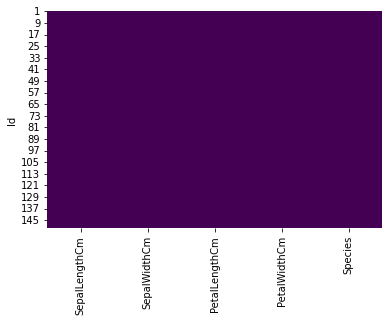

In [9]:
sns.heatmap(iris_data.isnull(), cbar=False, cmap='viridis')

- No null values in the data set
- So, no imputation required.

- Now, lets explore the data.
- Let's look at the relationships between the **target** and between other variables as well.
- Setting the target variable in the below cell.

In [10]:
target = iris_data['Species']

1. relationship between **SepalLengthCm** and **target** using histplot

<AxesSubplot:xlabel='SepalLengthCm', ylabel='Species'>

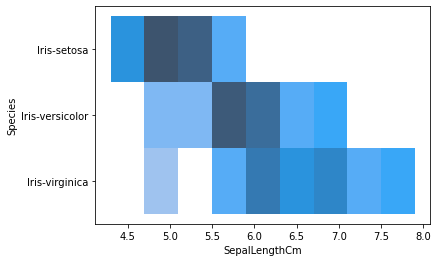

In [11]:
sns.histplot(x=iris_data['SepalLengthCm'], y=target)

- it can be seen from the above plot that *Iris-setosa* is almost classifiable while the rest form an overlapping perspective, when **SepalLengthCm >= 5.5**

2. Relationship between *SepalWidthCm* and *target* variable: using histplot 

<AxesSubplot:xlabel='SepalWidthCm', ylabel='Species'>

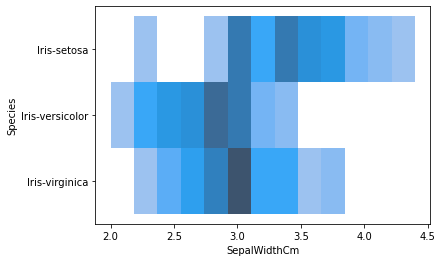

In [12]:
sns.histplot(x=iris_data['SepalWidthCm'], y=target)

- the above plot generates a fuzzy relationship between Species and SepalWidthCm.
- So, this feature may not effect the accuracy of our model much.
- this is because most of the classified region(of all the species) lies in the range of:

    *SepalWidthCm >= 2.7 and SepalWidthCm <= 3.5*

3. Relationship between *SepalLengthCm*/*SepalWidthCm* and target vairable: using swarmplot
    - because from the above dataset it's clear that most of the points overlapp incase of SepalWidthCm, and easily classifiable incase of SepalLengthCm.
    - So, from the plot below, we can infer that above the value of 1.75 *Iris-setosa* is most not present, hence easily classifiable at this margin.

<AxesSubplot:ylabel='Species'>

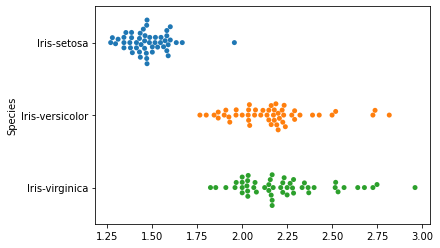

In [24]:
sns.swarmplot(x=iris_data['SepalLengthCm']/iris_data['SepalWidthCm'], y=target)

- **Conclusion from the above plot**:
    - The division of the above two features led us to a ***new*** feature!
    - This feature can be used for classification.
    - Thus, is an imporant feature.

4. Relationship between *PetalLengthCm* and *target*

<AxesSubplot:xlabel='PetalLengthCm', ylabel='Species'>

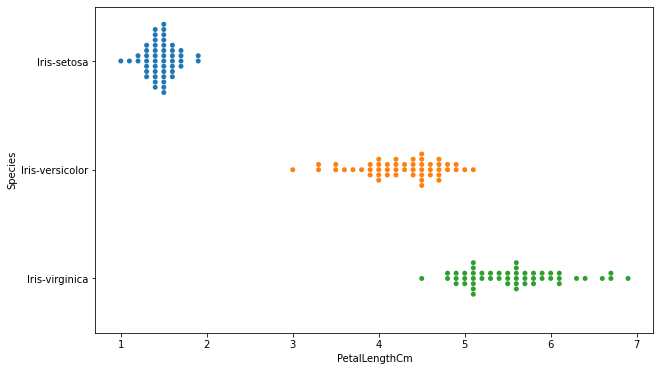

In [17]:
plt.figure(figsize=(10,6))
sns.swarmplot(data=iris_data, x='PetalLengthCm', y=target)

- from the above swarmplot we can see that *Iris-setosa* is easily classifiable when the *PetalLengthCm* is in (0.5, 2).
- Also, in the range (3, 4.8) *Iris-versicolor* can be indentified, and in the range (4.8, 7) *Iris-virginica* can be indentified.
- So, the *PetalLengthCm* can be an **important** feature in our model.

5. Relationship between *PetalWidthCm* and *target* variable: using swarmplot

<AxesSubplot:xlabel='PetalWidthCm', ylabel='Species'>

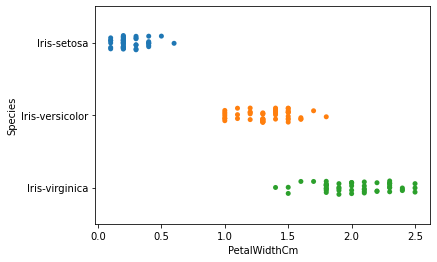

In [18]:
sns.stripplot(x=iris_data['PetalWidthCm'], y=target)

- again the plot can be easily classified for *Iris-setosa* but not clear for the rest species.
- in the below I've taken the petal_area(almost) to see it's variation with the target variable, let's see what I get.

<AxesSubplot:ylabel='Species'>

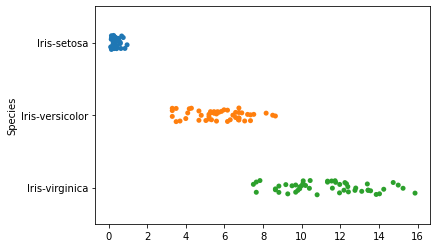

In [19]:
sns.stripplot(x=iris_data['PetalWidthCm']*iris_data['PetalLengthCm'], y=target)

- Now the plot can be used to easily classify between almost all the three species.
- for *Iris-setosa* the petal_area is in range (0, 1)
- for *Iris-versicolor* the petal_area is in range (3, 8.5)
- for *Iris-virginica* the petal_area is in range (7.5, 16)
SO, there is really a small portion in the intersection of the above two species i.e: *Iris-versicolor* and *Iris-virginica*, which actually favours our analysis!

- **Conclusion from the above plot**:
    - We can design a new feature named: **PetalArea**, which can play an important role towards a good model.

### Feature Engineering

- Correlation matrix with heatmap

<AxesSubplot:>

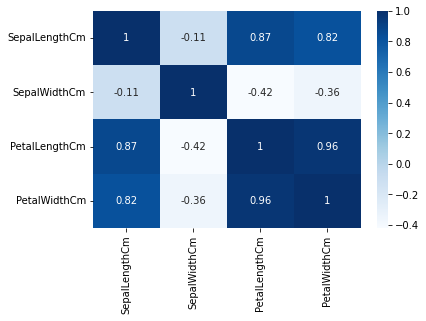

In [25]:
sns.heatmap(iris_data.corr(), cbar=True, annot=True, cmap='Blues')

- from the correlation matrix we can identify how a feature depends on the other.
- so, let's set a margin above which a feature will be considered dependent on the other, and one must be dropped.
- in the above map, it can be noticed that *PetalLengthCm* is 0.96 related to *PetalWidthCm* so, these are dependent on each other, one must be dropped.
- from EDA I realized that *PetalLengthCm* is a much promising feature than *PetalWidthCm* since it has less overlapping reagion in *Iris-versicolor* and *Iris-virginica*.
- So, let's drop *PetalWidthCm*!